In [29]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
names = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "year",
    "origin",
    "model",
]

# '\s+' means "more than 1 space" you can download the
# data from the data_url to inspect the data and see why this makes sense
df = pd.read_csv(data_url, sep="\s+", names=names)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,model
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
df.isna().mean()

mpg             0.019704
cylinders       0.000000
displacement    0.000000
horsepower      0.014778
weight          0.000000
acceleration    0.000000
year            0.000000
origin          0.000000
model           0.000000
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
df = df.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
df["make"] = df["model"].str.split(" ").str[0]
df["make"].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
vw                6
volvo             6
chrysler          6
subaru            4
opel              4
saab              4
renault           3
chevy             3
mercedes-benz     2
bmw               2
cadillac          2
maxda             2
chevroelt         1
mercedes          1
hi                1
capri             1
triumph           1
toyouta           1
vokswagen         1
nissan            1
Name: make, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
make_counts = df["make"].value_counts()
keep_counts = make_counts[make_counts >= 5]
keep_makes = keep_counts.index

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
df.loc[~df["make"].isin(keep_makes), "make"] = "other"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
X = df.drop(columns=["mpg", "model"])
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
cat_cols = ["make", "origin"]
drop_cats = ["ford", 1.0]

# The rest are numeric
num_cols = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
preprocessing = ColumnTransformer(
    [
        ("scale", StandardScaler(), num_cols),
        ("one_hot_encode", OneHotEncoder(drop=drop_cats), cat_cols),
    ]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
pipeline = Pipeline(
    [
        # ("name of step", sklearn object with a fit method)
        ("preprocessing", preprocessing),
        #         ("pca", PCA()),
        ("knn", KNeighborsRegressor()),
    ]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['cylinders', 'displacement',
                                                   'horsepower', 'weight',
                                                   'acceleration', 'year']),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(drop=['ford',
                                                                      1.0]),
                                                  ['make', 'origin'])])),
                ('knn', KNeighborsRegressor())])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
print("train score: {}".format(pipeline.score(X_train, y_train)))
print("test score: {}".format(pipeline.score(X_test, y_test)))

train score: 0.8949327342466501
test score: 0.838048356730813


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
y_pred = pipeline.predict(X_test)

MAE = np.mean(abs(y_test - y_pred))
MAPE = np.mean(abs((y_test - y_pred) / y_test))
print(MAE)
print(MAPE)

2.1488607594936706
0.0943511893161619


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

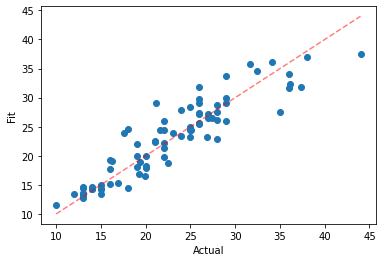

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
line_pts = [y_test.min(), y_test.max()]
plt.scatter(y_test, y_pred)
plt.plot(line_pts, line_pts, c="red", ls="--", alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Fit")
plt.show()

In [42]:
X = df.drop(columns=["mpg", "model"])
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
pipeline1 = Pipeline(
    [
        # ("name of step", sklearn object with a fit method)
        ("preprocessing", preprocessing),
        #         ("pca", PCA()),
        ("OLS", LinearRegression()),
    ]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['cylinders', 'displacement',
                                                   'horsepower', 'weight',
                                                   'acceleration', 'year']),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(drop=['ford',
                                                                      1.0]),
                                                  ['make', 'origin'])])),
                ('OLS', LinearRegression())])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
print("train score: {}".format(pipeline1.score(X_train, y_train)))
print("test score: {}".format(pipeline1.score(X_test, y_test)))

train score: 0.8579147207461224
test score: 0.7797158900445814


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
y_pred = pipeline1.predict(X_test)

MAE = np.mean(abs(y_test - y_pred))
MAPE = np.mean(abs((y_test - y_pred) / y_test))
print(MAE)
print(MAPE)

2.548352088691562
0.13055309176726482


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

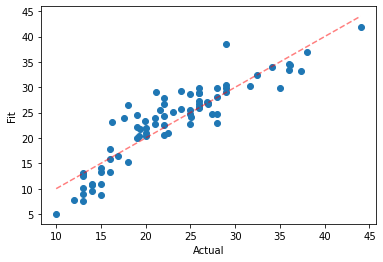

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
line_pts = [y_test.min(), y_test.max()]
plt.scatter(y_test, y_pred)
plt.plot(line_pts, line_pts, c="red", ls="--", alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Fit")
plt.show()

### KNN Regressor VS Linear Regression

It can be seen in the graphs above that KNN did a better job of fitting a line. With the OLS model, there excessive under-, and over, -shooting as compared with the KNN Reg model. The error in the KNN Reg. model is evenly distributed as compared to error in the Linear Reg. model. 

The KNN seems to be a little less overfit as well. It would make sense for the KNN Reg model to perform better, when considering the data and the target, "mpg". Vehicles are built in different classes that have almost characteristic 'mpg' levels. So, there is already some tendency for clustering in the data, given the source, and this is where a k